<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/KNN_Preprocessing_10clasess_TEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN on TEP with prerpcessing 10 classes

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Importing TEP

In [121]:
##Train
Fault_Free_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

## Sorting Data
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

###consdering same sample for all calsses

In [129]:
X1=Faulty_Train[(Faulty_Train.faultNumber==1)].iloc[0:480,:]
X3=Faulty_Train[(Faulty_Train.faultNumber==3)].iloc[0:480,:]
X5=Faulty_Train[(Faulty_Train.faultNumber==5)].iloc[0:480,:]
X7=Faulty_Train[(Faulty_Train.faultNumber==7)].iloc[0:480,:]
X9=Faulty_Train[(Faulty_Train.faultNumber==9)].iloc[0:480,:]
X11=Faulty_Train[(Faulty_Train.faultNumber==11)].iloc[0:480,:]
X13=Faulty_Train[(Faulty_Train.faultNumber==13)].iloc[0:480,:]
X15=Faulty_Train[(Faulty_Train.faultNumber==15)].iloc[0:480,:]
X17=Faulty_Train[(Faulty_Train.faultNumber==17)].iloc[0:480,:]
Faulty_Train_T=pd.concat([X1,X3,X5,X7,X9,X11,X13,X15,X17])
type(Faulty_Train_T)
type(Fault_Free_Train)

Faulty_Test_1= Faulty_Test[(Faulty_Test.faultNumber==1)|
                                 (Faulty_Test.faultNumber==3 )|
                                 (Faulty_Test.faultNumber==5 )|
                                 (Faulty_Test.faultNumber==7 )|
                                 (Faulty_Test.faultNumber==9 )|
                                 (Faulty_Test.faultNumber==11 )|
                                 (Faulty_Test.faultNumber==13)|
                                 (Faulty_Test.faultNumber==15 )|
                                 (Faulty_Test.faultNumber==17)]

## Scalling All

In [143]:
Fault_Free_Train_2=(Fault_Free_Train).iloc[:,4:]
Faulty_Train_T_2=(Faulty_Train_T).iloc[:,4:]
Fault_Free_Test_2=(Fault_Free_Test).iloc[:,4:]
Faulty_Test_2=(Faulty_Test_1).iloc[:,4:]
Train=pd.concat([Fault_Free_Train,Faulty_Train_T])
Test=pd.concat([Fault_Free_Test,Faulty_Test_1])
ff = pd.concat([Fault_Free_Train_2,Faulty_Train_T_2,Fault_Free_Test_2,Faulty_Test_2])
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

### Fault Detecting by mean and STD for dropping variables

In [ ]:
	"""
	Plotting new Varibales through Classes for 15 and Fault Detecting with Std and Mean
	"""
	jj=0
Lable=np.zeros((14400,52))
	for i in range(len(tr_s[0,:])):
	    plt.figure()
	    plt.plot(tr_s[:,i])
	    plt.plot((np.mean(tr_s[:,i])+3*np.std(tr_s[:,i]))*np.ones(14400),color='black', linewidth='4')
	    plt.plot((np.mean(tr_s[:,i])-3*np.std(tr_s[:,i]))*np.ones(14400),color='black',linewidth='4')
	    for k in range(0,14400,1):
	        if ((tr_s[k,i]))>(np.mean(tr_s[:,i])+3*np.std(tr_s[:,i])) or (tr_s[k,i])<(np.mean(tr_s[:,i])-3*np.std(tr_s[:,i])):
	            jj=jj+1
	        if jj>100:
	                Lable[(k//480)*480:((k//480)+1)*480,i]=1
	                jj=0
	    plt.plot(np.arange(0,14400,1),Lable[:,i], linewidth='4')
	    for j in range(0,14400,480):
	        plt.axvline(x =j, ymin=0, ymax=1000, linewidth = 1, linestyle ="--", color ='red')
	    plt.xlabel('Classes')
	    plt.ylabel('Amplitude')
	    plt.grid()
	    font1 = {'color':'g','size':15}
	    plt.title("X{}".format(i+1),fontdict = font1)
	plt.show()

In [144]:
ff.drop(['xmeas_5','xmeas_12','xmeas_15','xmeas_17','xmeas_37','xmeas_15','xmeas_17','xmv_1','xmv_7','xmv_8'],axis=1,inplace=True)

## Scaling with dropping Variables

In [146]:
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s_2 = scaler.transform(ff)

In [155]:
Data_Train=tr_s_2[0:4800,:]
Data_Test=tr_s_2[4800:,:]
Label_Train=Train.iloc[:,1].values
Label_Test=Test.iloc[:,1].values

## Applying KNN

In [212]:
classifier_KNN = KNeighborsClassifier (n_neighbors = 100  ,   metric = 'minkowski'  ,  p = 3  ,  weights='distance'  ,  algorithm = 'kd_tree' )
classifier_KNN.fit(Data_Train, Label_Train)
Label_prediction = classifier_KNN.predict(Data_Test)

### Visualizing KNN

In [213]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [214]:
cm_KNN = confusion_matrix(Label_Test, Label_prediction)
print(cm_KNN)

[[372   0 121  44   0 297   0   0 126   0]
 [ 65 789  19   9   0  45   0   0  33   0]
 [385   0 116  46   0 290   0   0 123   0]
 [201   0  51 457   1 176   0   0  73   1]
 [ 60   0  19   9 799  44   0   0  29   0]
 [366   0 125  44   0 297   0   0 128   0]
 [237   0 117  36   0 190 292   0  86   2]
 [ 97  19  32 123 167  78   0 378  64   2]
 [364   0 128  48   0 286   0   0 134   0]
 [171   0  89  24   0 130  44   0  71 431]]


Confusion matrix, without normalization


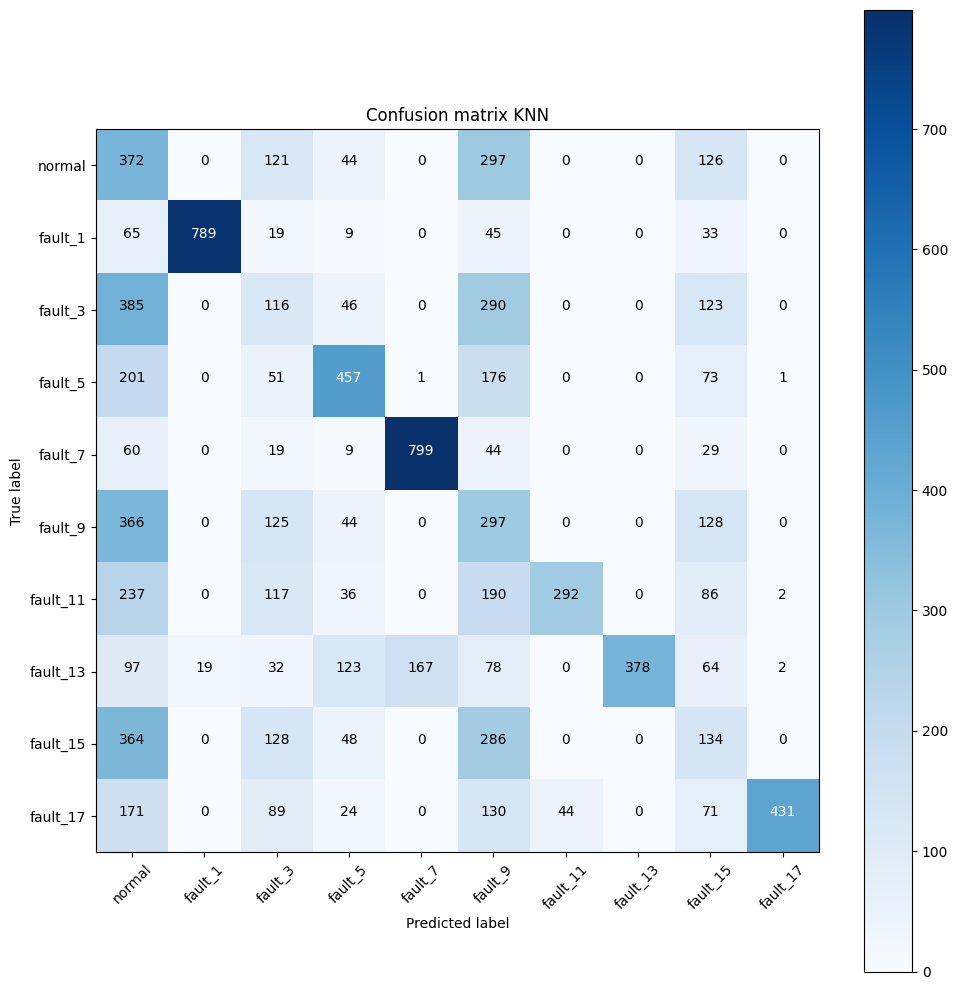

In [215]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_KNN, [ 'normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11',
       'fault_13', 'fault_15', 'fault_17'],
                          normalize=False,
                          title='Confusion matrix KNN',
                          cmap=plt.cm.Blues)

In [216]:
print(sum(cm_KNN.T))
print(sum(cm_KNN))

[960 960 960 960 960 960 960 960 960 960]
[2318  808  817  840  967 1833  336  378  867  436]


### Accuracy Report

In [217]:
from sklearn.metrics import classification_report
Target_Names=['normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11','fault_13', 'fault_15', 'fault_17']
print(classification_report(Label_Test,Label_prediction,target_names=Target_Names))

              precision    recall  f1-score   support

      normal       0.16      0.39      0.23       960
     fault_1       0.98      0.82      0.89       960
     fault_3       0.14      0.12      0.13       960
     fault_5       0.54      0.48      0.51       960
     fault_7       0.83      0.83      0.83       960
     fault_9       0.16      0.31      0.21       960
    fault_11       0.87      0.30      0.45       960
    fault_13       1.00      0.39      0.57       960
    fault_15       0.15      0.14      0.15       960
    fault_17       0.99      0.45      0.62       960

    accuracy                           0.42      9600
   macro avg       0.58      0.42      0.46      9600
weighted avg       0.58      0.42      0.46      9600

